In [1]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


# Problem Statement

Construct a linear regression model that predicts the duration of sleep given the time engaged in physical activity (in minutes), stress level experienced (between 1-10), and self-reported quality of sleep (between 1-10) for 374 people.

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | duration of sleep | dependent variable | $T$ | hours |
| $\beta_0$ | regression coefficient for sleep duration | parameter | $T$ | hours |
| $X_1$ | time engaged in physical activity during the day | independent variable | $T$ | minutes |
| $\beta_1$ | regression coefficient for physical activity | parameter | $T$ | hours/minutes |
| $X_2$ | self-reported stress level experienced (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_2$ | regression coefficient for stress level | parameter | $T$ | hours |
| $X_3$ | self-reported quality of sleep (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_3$ | regression coefficient for quality of sleep | parameter | $T$ | hours |
| $\epsilon$ | residual error | parameter | $T$ | hours |

# Assumptions and Constraints

- The subjective formulation of a score from 1 to 10 for stress experienced and quality of sleep is uniform across all participants.
- Participants are assumed to report their sleep times and subjective scores truthfully and without bias.
- The sample is assumed to represent the general population to which the model will be applied.
- Sleep duration is assumed to be influenced only by the variables included in the model, no additional variables affect it.
- The relationship between sleep duration and the predictors is assumed to be linear.
- The explanatory variables are assumed to be linearly independent.
- The model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$.
- The average value of the error is 0: i.e, $\mathbb{E}(\epsilon_i) = 0$ for all $i$.
- The variance of the error is constant: i.e, $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\epsilon$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$.

# Building the Solution

The linear regression model is defined as $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

We first fit a baseline linear regression model using `statsmodels.api` to understand how well the raw data satisfies the 3 core assumptions of linear regression and to diagnose any other structural issues in the untransformed data. Below is our analysis of that model.

In [2]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)

In [3]:
X = sleep[['Physical_Activity','Quality','Stress']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print("R^2 Adj: " + reg.rsquared_adj.astype('str'))
print(reg.params)

R^2 Adj: 0.7833097936534077
const                3.673707
Physical_Activity    0.002414
Quality              0.498098
Stress              -0.060716
dtype: float64


**Observations from the Summary Table (Omitted for Space):**

The $R^2$ and $R^2_{adj}$ are both relatively high, indicating that most of the variance in the target variable (Sleep Duration) can be explained by the model features. We see that the regression coefficient value for Physical Activity is near $0$, which could indicate that either Physical Activity is not a good predictor of our target variable or that it is not on the same scale as the rest of the data. To further assess the model's validity, we now examine if the first three core assumptions of linear regression are satisfied. The fourth assumption of errors being independent is something we must assume without being able to verify, as the given dataset is not ordered by time or index.

# Analyze and Assess

## Analysis of the Residual-Covariate/Partial Regression Plots

Residual-covariate and partial regression plots evaluate whether the first assumption of linear regression, the average value of the error being 0 ($\mathbb{E}(\epsilon_i) = 0, ∀ i$), is satisfied.

#### Residual Plots

In the residuals versus Physical Activity plot, the data is not evenly distributed over and under the $y=0$ line. When we look at residuals versus Sleep Quality, some columns of data points are not distributed evenly across the $y=0$ line. However, this violation isn’t as extreme as in the Physical Activity plot. Finally, we look at residuals versus Stress, where this plot actually satisfies the condition of being evenly distributed over the horizontal axis. However, with two of the three variables violating the condition, we conclude that the residual plots are not randomly scattered.

#### Partial Regression Plots 

Because the variables take integer values for self-reported scores, the scatter plots show vertical columns of points. This makes it harder to judge whether the covariates exhibit a linear trend, but the overall pattern is still relatively clear. The covariates that best exhibit a linear trend are Sleep Quality and the regression constant, even though the correlations are still fairly weak. However, the Physical Activity and Stress plots don't show a linear trend. Thus, with two out of four plots not following a linear trend and the other two being somewhat inconclusive, we determine that this condition is violated as well.

#### Conclusion

In both the above analyses, the condition for the average value of the errors to be 0 is violated. Therefore, the linear regression model built from the untransformed data violates the first assumption of linear regression.

## Analysis of the Residuals-Fitted Y's Plot

If the residuals vs fitted model values produce a plot that is randomly scattered about the horizontal axis, the assumption that the variance of the errors is constant ($\text{Var}(\epsilon_i) = \sigma^2, ~\forall i$) is satisfied. However, we observe a cluster of data below the horizontal axis around fitted values of approximately 6.25 to 7.5 hours of sleep, with the residuals being narrowly centered around the middle. This non-random structure indicates that the variance is not constant, thus violating the second assumption of linear regression.

## Analysis of the Normal-Residuals (QQ) plot

The third assumption requires that points lie linearly along the line $y=x$ in the QQ plot so that the errors $\vec{\epsilon}_i$ match random samples from the normal distribution with zero mean and variance $\sigma^2$. In the QQ plot, we observe that the residuals do not lie on the $y=x$ line but instead form a tilted parabola, indicating a right-skewed distribution. Hence, we conclude that the model violates the third assumption of linear regression.

## Conclusion on Assumptions (Untransformed Data)

In summary, the untransformed data fail to meet the assumptions required for a valid linear regression model. As a result, we will transform the data to find a model that better satisfies the first three assumptions of linear regression. 

## Transforming Data and Model Fitting

### Explanation of Transformations

To reduce the extent to which the original model violated certain linear regression assumptions, we transformed the input and output variables of the data using different mathematical functions. We sought a combination of functions that aligned the diagnostic plots with what we expect for linear regression while also maintaining or improving the overall $R^2_{adj}$ value. Through trial and error, we concluded on the following transformations:
- Taking the square of the Stress values; 
- Taking the square of the Sleep Quality values;
- Taking the square of the Physical Activity values;
- Taking the natural log of the Sleep Duration values;

We considered another model that transformed the Sleep Quality values using the natural log, which greatly improved the QQ plot by aligning the points more along the idealized line. However, this model had a lower $R^2_{adj}$ than the untransformed model, less linear points in the partial regression plots for Sleep Quality and the regression constant ($\beta_0$), and less random scatter in the residual against fitted value plot. With these factors in consideration, we decided to use the square of Sleep Quality values in our final model.

In [4]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity'] = (sleepTransformed['Physical_Activity'])**2
sleepTransformed['Quality'] = (sleepTransformed['Quality'])**2
sleepTransformed['Stress'] = (sleepTransformed['Stress'])**2
sleepTransformed['Duration'] = np.log(sleepTransformed['Duration'])
X_transformed = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y_transformed = sleepTransformed['Duration']
X_transformed = sm.add_constant(X_transformed)
reg_transformed = sm.OLS(Y_transformed, X_transformed).fit()
print(reg_transformed.rsquared_adj)

0.8047269776324298


Each transformation increased the model's $R^2_{adj}$ coefficient. Our model’s $R^2_{adj}$ value of 0.805 indicates that the model fits the data closely.

The final model’s residual-versus-covariate plot for Physical Activity improved by moving negative residuals closer to zero. The stress and quality plots improved by bringing previously positive residuals closer to zero. 

Below are the partial regression plots on the untransformed data.

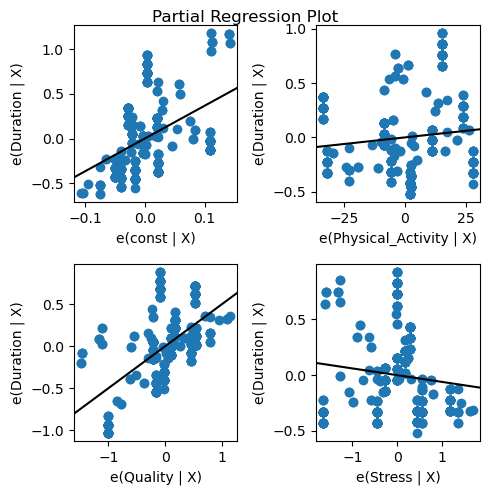

In [5]:
# Plot 1 (Partial Regression Plots on Untransformed Data)
fig = plt.figure(figsize=(5,5))
sm.graphics.plot_partregress_grid(reg,fig=fig)
plt.show()

Below are the partial regression plots on the transformed data.

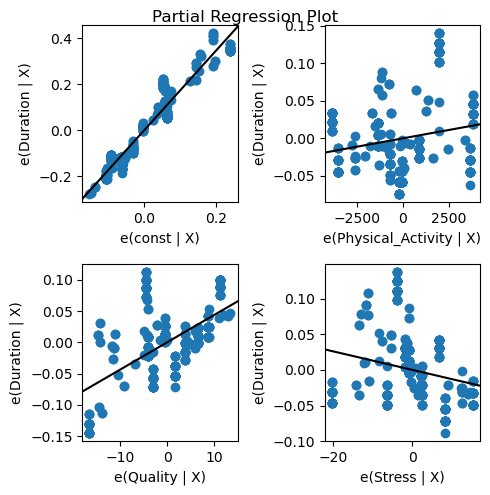

In [6]:
# Plot 2 (Partial Regression Plots on Transformed Data)
fig = plt.figure(figsize=(5,5))
sm.graphics.plot_partregress_grid(reg_transformed,fig=fig)
plt.show()

Although the partial regression plot for physical activity did not improve by much, the corresponding plots for stress and quality show stark improvement. 

In [7]:
fitted_y_original = reg.fittedvalues
residuals_original = reg.resid

fitted_y_transformed = reg_transformed.fittedvalues
residuals_transformed = reg_transformed.resid

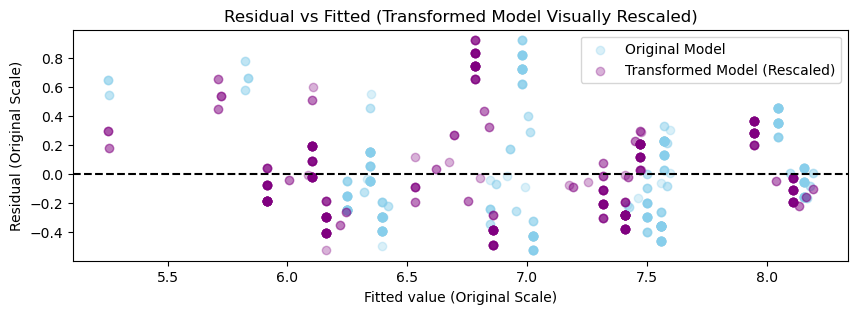

In [8]:
# Plot 3 (Overlaid Constant Variance Plot)
def rescale_to_range(values, new_min, new_max):
    old_min, old_max = values.min(), values.max()
    return (values - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

fitted_trans_scaled = rescale_to_range(fitted_y_transformed, fitted_y_original.min(), fitted_y_original.max())
residuals_trans_scaled = rescale_to_range(residuals_transformed, residuals_original.min(), residuals_original.max())

plt.figure(figsize=(10,3))
plt.scatter(fitted_y_original, residuals_original, color='skyblue', alpha=0.3, label='Original Model')
plt.scatter(fitted_trans_scaled, residuals_trans_scaled, color='purple', alpha=0.3, label='Transformed Model (Rescaled)')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted value (Original Scale)")
plt.ylabel("Residual (Original Scale)")
plt.legend()
plt.title("Residual vs Fitted (Transformed Model Visually Rescaled)")
plt.show()

In the residual-versus-fitted values plot of the final model, the previously large positive residuals are closer to the $y=0$ line.

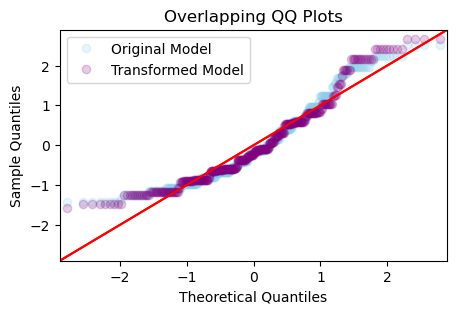

In [9]:
# Plot 4 (Overlapping QQ Plots)
residuals_original = reg.resid
fig, ax = plt.subplots(figsize=(5,3))
plt.title("Overlapping QQ Plots")
sm.qqplot(residuals_original, fit = True, line='45', markerfacecolor='skyblue', markeredgecolor='skyblue', alpha = 0.2, ax=ax, label='Original Model')
sm.qqplot(residuals_transformed, fit = True, line='45', markerfacecolor='purple', markeredgecolor='purple', alpha = 0.2, ax=ax, label='Transformed Model')
plt.legend()
plt.show()

Unfortunately, the QQ plot of the transformed data looks slightly worse than the untransformed data. The points at the top end of the transformed model deviate more, so they do not lie along the idealized line as much as points from the untransformed model.

Therefore, the transformation lessened the violations on the assumptions that the errors have a mean of zero and a constant variance. However, the assumption that errors are normally distributed is slightly more violated.

### Real-World Interpretation of Covariates

In [10]:
print(reg_transformed.params)

const                1.742561
Physical_Activity    0.000004
Quality              0.004368
Stress              -0.001296
dtype: float64


Sleep Quality shows the strongest positive correlation with Sleep Duration as expected, since an adequate amount of sleep would likely be a major factor in determining Sleep Quality.

Stress shares a negative correlation with Sleep Duration, implying that high stress levels will shorten sleep as expected. Moreover, the magnitude of Stress is smaller than Quality, indicating that it affects Sleep Duration less than Sleep Quality. 

Finally, comparing the coefficient for Physical Activity ($\beta_1 = 4.473e^{-6}$) against the other covariates, it could be natural to conclude that physical activity contributes extremely little in predicting Sleep Duration. However, once we account for the fact that Physical Activity data is roughly on a scale of two orders of magnitude larger (after the feature transformation) than those of Stress and Sleep Quality, we see that Physical Activity does contribute in a smaller but still significant way to predicting Sleep Duration, which is also what we would expect given the well known correlation between physical activity and health.

In conclusion, our transformed model lessens the severity of violations on the linear regression assumptions, but further improvements could be made to satisfy the conditions better. The model produces reasonable predictions, and the coefficients align with our expectations of how each covariate affects the output.